### pRS112 
QUEEN script for lentiviral GFP expression plasmid construction. 
1. An enhanced green fluorescent protein (eGFP)-encoding cassette was amplified from the pLV-eGFP plasmid using the primer pair RS204/SI627 that has overhang sequences encoding EcoRI and BamHI restriction digestion sites. 
2. The eGFP-encoding cassette was digested by EcoRI and BamHI.
3. The destination plasmid pLVSIN-CMV-Puro (Takara) was also digested by EcoRI and BamHI.
4. The eGFP-encoding cassette was cloned into the destination vector using T4 DNA ligase (NEB).

In [1]:
%matplotlib inline

In [2]:
import sys 
from QUEEN.queen import *
set_namespace(globals()) 
from QUEEN import cutsite as cs 

In [3]:
QUEEN(record="https://benchling.com/s/seq-0r6kj1kOMYhArIFPTIg5", dbtype="benchling", product="pLVSIN_CMV_pur")
QUEEN(record="36083", dbtype="addgene", product="pLV_eGFP")

<queen.QUEEN object; project='pLV_eGFP', length='7435 bp', topology='circular'>

In [4]:
pn = "PCR" 
pd = "1. An enhanced green fluorescent protein (eGFP)-encoding cassette was amplified from the pLV-eGFP plasmid using the primer pair RS204/SI627 that has overhang sequences encoding EcoRI and BamHI restriction digestion sites."
QUEEN(seq="TCCGGTGAATTCCCGAGCGTGTCAGGGTGACCATGGTGAGCAAGGGCGAGGA", product="RS204")
QUEEN(seq="CTCCCCTACCCGGTAGAATTGGATCCTTACTTGTACAGCTCGTCC",product="SI627")
pLV_eGFP.searchsequence(query=RS204.seq[-18:], product="FW", pn=pn, pd=pd)
pLV_eGFP.searchsequence(query=SI627.seq[-18:], product="RV", pn=pn, pd=pd)
cropdna(pLV_eGFP, FW[0].end, RV[0].start, product="extract1", pn=pn, pd=pd)
modifyends(extract1, RS204.seq, SI627.rcseq, product="PCR_product", pn=pn, pd=pd)

<queen.QUEEN object; project='PCR_product', length='778 bp', topology='linear'>

In [5]:
pn = "Restriction enzyme digestion" 
pd = "2. The eGFP-encoding cassette was digested by EcoRI and BamHI."
PCR_product.searchsequence(cs.lib["EcoRI"], product="EcoRI", pn=pn, pd=pd)
PCR_product.searchsequence(cs.lib["BamHI"], product="BamHI", pn=pn, pd=pd)
cropdna(PCR_product, EcoRI[0], BamHI[0], product="fragment_1", pn=pn, pd=pd)

<queen.QUEEN object; project='fragment_1', length='750 bp', topology='linear'>

In [6]:
pn = "Restriction enzyme digestion" 
pd = "3. The destination plasmid pLVSIN-CMV-Puro (Takara) was also digested by EcoRI and BamHI."
pLVSIN_CMV_pur.searchsequence(cs.lib["EcoRI"], product="EcoRI", pn=pn, pd=pd)
pLVSIN_CMV_pur.searchsequence(cs.lib["BamHI"], product="BamHI", pn=pn, pd=pd)
cropdna(pLVSIN_CMV_pur, BamHI[0], EcoRI[0], product="fragment_2", pn=pn, pd=pd)

<queen.QUEEN object; project='fragment_2', length='7586 bp', topology='linear'>

In [7]:
pn = "Ligation"
pd = "4. The eGFP-encoding cassette was cloned into the destination vector using T4 DNA ligase (NEB)."
joindna(fragment_1,fragment_2, product="pRS112", topology="circular", pn=pn, pd=pd)

<queen.QUEEN object; project='pRS112', length='8328 bp', topology='circular'>

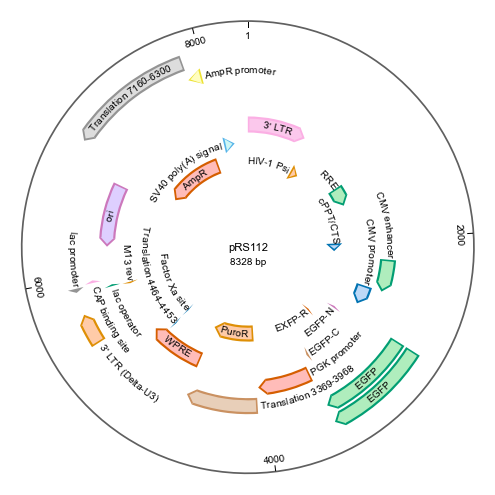

In [8]:
fig = visualizemap(pRS112, map_view="circular")

In [9]:
pRS112.outputgbk("output/pRS112.gbk")

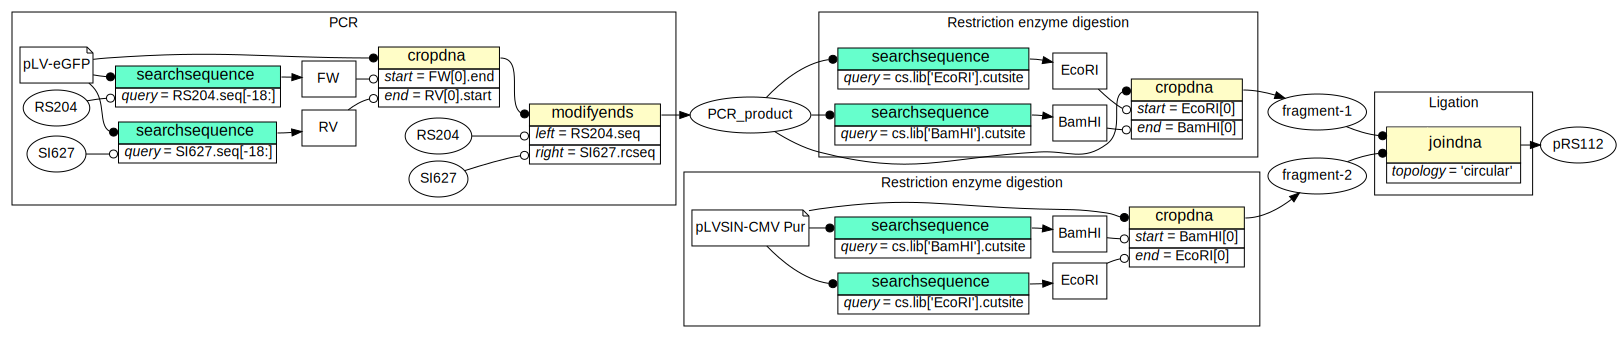

In [10]:
flow = visualizeflow(pRS112, alias_dict={"fragment_1":"fragment-1", "fragment_2":"fragment-2", "pLV_SI_112":"pLV-SI-112","pLVSIN_CMV_pur":"pLVSIN-CMV Pur", "pLV_eGFP":"pLV-eGFP"})
flow.render("output/pRS112_construnction")
flow

In [11]:
quine(pRS112, execution=True)

True

In [13]:
quine(pRS112, process_description=True)

1. An enhanced green fluorescent protein (eGFP)-encoding cassette was amplified from the pLV-eGFP plasmid using the primer pair RS204/SI627 that has overhang sequences encoding EcoRI and BamHI restriction digestion sites.
2. The eGFP-encoding cassette was digested by EcoRI and BamHI.
3. The destination plasmid pLVSIN-CMV-Puro (Takara) was also digested by EcoRI and BamHI.
4. The eGFP-encoding cassette was cloned into the destination vector using T4 DNA ligase (NEB).
